# Exam Final 

**I affirm that I have upheld the highest principles of honesty and integrity in my academic work and have not witnessed a violation of the Honor Code.**

### your signature here
Quan Nguyen


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.47,4)
plt.style.use('seaborn')
import matplotlib.cm as cm
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("talk")
np.random.seed(0)
#-----------------------------
from urllib.request import urlopen
from PIL import Image
#-----------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import naive_bayes                    #naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC                        #SVM "Support vector classifier"
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
#-----------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import time
#-----------------------------
import tensorflow as tf
#-----------------------------

### Notes

* Problem 1: Yes/no.  Please give reasoning to support your answer.
* Problem 2: Short answer.  Please give reasoning to support your answer.
* Problem 3: Short computation. please show your work. Can include an image/photo of your work.
* Problem 4: Clustering image colors
* Problem 5: Construct classifier for Malware dataset. 

#### For all problems, discuss your results.



# Problem 1:

For each of the following applications, decide whether machine learning would offer a viable solution and briefly justify your decision:
1. Predicting whether a particular chemical compound is carcinogenic (i.e., will induce cancer).
2. Determining which applicants should be extended a home loan.
3. Discovering what grocery items customers tend to buy together.
4. Grouping customers by socio-demographic attributes and banking habits.
5. Predicting tomorrow's value of Microsoft's stock.
6. Predicting whether a Netflix subscriber will continue to subscribe.
7. Sorting a list of number in ascending order.

#### Your answeres here:
be sure to provide reasoning for your answer

1. Yes, we can check other compounds that are similar to this or in the same group with the compound we want to predict. However, another approach is to collect data and finding to relation between that compound and cancer to find out if it is carcinogenic, but this method just use correlation which does not need machine learning
2. Maybe, applications who need to extend loan tend to have features such as low income, huge amount of loan, 
3. Yes, items similar or used to support each other have more tendency being b ought together. We can use similar features or category of items to group them in the same group
4. Yes, this is can be a classification problem
5. Absolutely, time series is usually used in this case
6. Yes, we can predict this base on how frequently they use, how long they have been subscribing, etc.
7. No, this is just a basic in data structure and algorithm



...

# Problem 2:

1. Explain the difference between supervised and unsupervised learning and give an example of each type.
2. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.  Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
3. If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so how (and why)? If not, why?



#### Your answeres here:


1. 
  * supervised: machine learning approach that’s defined by its use of labeled datasets. Using labeled inputs and outputs, the model can measure its accuracy and learn over time. Eg: classification (KNN, SVM, Random Forest, etc), regression (linear regression, logistic regression, etc)
  * unsupervised: analyze and cluster unlabeled data sets. Eg: Clustering (K-Means), Dimensionality reduction (PCA)
2. Two Logistic Regression becase we have to classify 2 features: outdoor/indoor and daytime/nighttime
3. Yes. We can use Ensemble method to all of them to create a better classifier by aggeraging the predictions of each classifier and predict the class that gets the most votes. This voting classifier may earn a better result the the best classifier in the ensemble

...

# Problem 3

1. About 2/3 of drivers use their cell phone while driving. Suppose that you are 5 times more likely to get into an accident if you text and drive, and if you don’t use your cell phone, you have a 1% chance of getting into an accident. What is the probability that someone was texting given that they got into an accident? (i.e. find $P(\text{Text|Accident})$ )


#### Your answeres here:

* $P(D)$: Prob don't text ($\frac{2}{3}$)
* $P(T)$: Prob text ($\frac{1}{3}$)

* $P(T|A) = \frac{P(A|T) * P(T)}{P(A)} = \frac{P(A|T) * P(T)}{P(A|T) * P(T) + P(A|D) * P(D)}$
* $P(T|A) = \frac{5 * P(A|D) * P(T)}{5 * P(A|D) * P(T) + P(A|D) * P(D)} = \frac{5\% * \frac{2}{3}}{5\% * \frac{2}{3} + 1\% * \frac{1}{3}} = \frac{10}{11}$

# Problem 4: Clusters of color in images

Let's use our data science tools to analyze some art by Mondrian (Tableau I).

<img src="http://public.gettysburg.edu/~jpuckett/ds325/exam03final/Tableau_Piet_Mondriaan.jpg" width="300"></img>


In an image, each pixel is represent by a 3-dimensional vector or 3 color channels (red, green, blue). We will convert the image into a float where these values are bound between 0 and 1.  
* red    (1,0,0)
* green  (0,1,0)
* blue   (0,0,1)
* white  (1,1,1)
* black  (0,0,0)
* etc


1. Use dimensional reduction to project the X (colors; red,green,blue) onto 2 dimensions and plot the colors on a 2-dimensional plot.  Identify clusters you observe.  You can color individual points with matplotlib using 
<code>
    plt.plot(Xplot[i,0],Xplot[i,1],'.',color=X[i])
</code>
where X is the unraveled image colors and Xplot is whatever you wanted to plot, and i is the index of the for loop.
2. Determine the **number** of clusters using a quantitative method we discussed in class.  That is, using data analysis find the **number** of dominant colors in the image of Mondrian's Tableau I. Support your answer with evidence.
3. Which colors are the dominant colors you found in (2)?  (white,black,red,orange,yellow,green,blue,violet,etc)  This is easier if you use the above code to plot actual color X for each plot point.
4. Discuss why you choose your methods (2) and your findings.


(348, 328, 3)


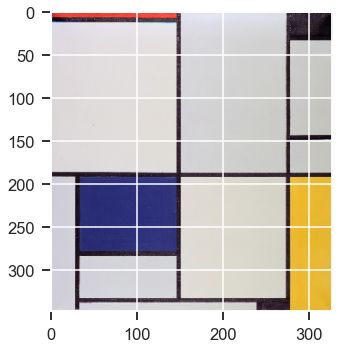

In [2]:
##img_url='https://upload.wikimedia.org/wikipedia/commons/3/36/Tableau_I%2C_by_Piet_Mondriaan.jpg'
webaddr='http://public.gettysburg.edu/~jpuckett/ds325/exam03final/'
filename='Tableau_Piet_Mondriaan.jpg'
img_url = webaddr+filename
img = np.array(Image.open(urlopen(img_url)))

img = img[::6,::6]    #down sample image only grab every 6th row and column; decrease amount of data by 36
print(img.shape)
plt.imshow(img)

In [3]:
#unravel X and rescale between 0 and 1
X = img.reshape(-1,3)
X = X.astype('float')/255   #this is our feature vector; we divide by 255 to make X a number between 0 and 1.
# X is now our unraveled set of colors, where X[i] is the color of the i-th pixel
# X[i] has the form (red,green,blue) where the (red,green,blue) are the features

In [4]:
print(X.shape)

(114144, 3)


#### 1. Use dimensional reduction to project the X (colors; red,green,blue) onto 2 dimensions and plot the colors on a 2-dimensional plot.  Identify clusters you observe. 

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(114144, 2)


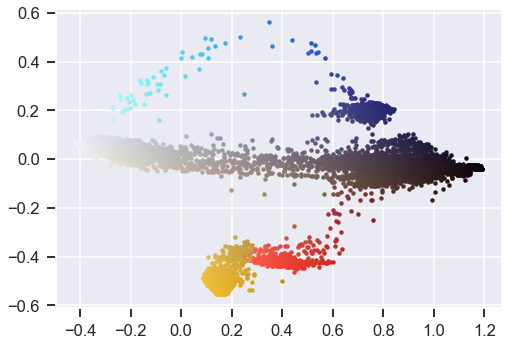

In [7]:
for i in range(len(X_pca)):
    plt.plot(X_pca[i,0],X_pca[i,1],'.',color=X[i])

#### 2. Determine the **number** of clusters using a quantitative method we discussed in class.  That is, using data analysis find the **number** of dominant colors in the image of Mondrian's Tableau I. Support your answer with evidence.

Text(0, 0.5, 'Silhouette Score')

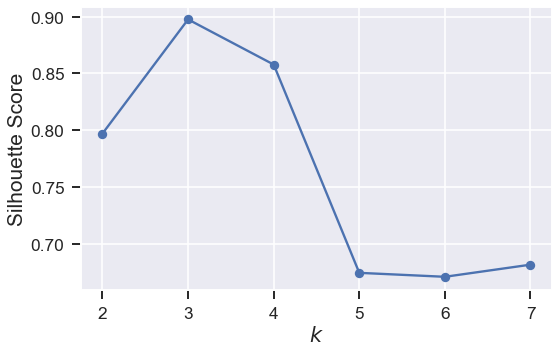

In [25]:
kMax = 7
ks = np.linspace(2,kMax,kMax-1).astype(int) 
s_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
  print(f'k={k}')
  kmeans = KMeans(n_clusters = k).fit(X_pca)
  labels = kmeans.labels_
  s_score[i] = silhouette_score(X_pca, labels, metric = 'euclidean')
fig = plt.figure(figsize = (8.1,5),dpi=75) 
plt.plot(ks,s_score,'o-')
plt.xlabel('$k$', fontsize=20) 
plt.ylabel('Silhouette Score', fontsize=20)

C:\Users\quannh\AppData\Local\Temp\ipykernel_8840\1921541525.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


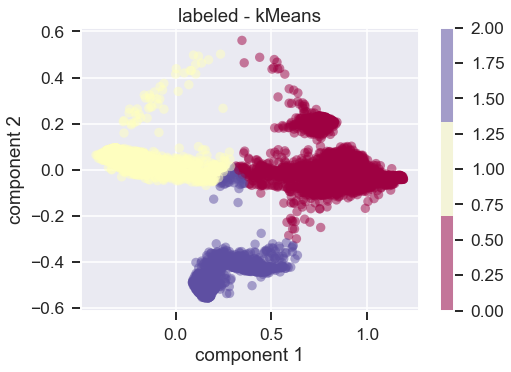

In [30]:
kBest = 3
kmeans = KMeans(n_clusters = kBest).fit(X_pca)
labels = kmeans.labels_
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=labels, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - kMeans')
plt.colorbar()

#### 3. Which colors are the dominant colors you found in (2)?  (white,black,red,orange,yellow,green,blue,violet,etc)  


Base on the K-Means result, we find there are 3 big groups (the plot right above this):
* The first yellow group includes colors such as light blue and maybe white grey
* The second red group includes colors such as dark colors and black
* The last group includes vivid colors such as yellow, orange, and red

#### 4. Discuss why you choose your methods (2) and your findings.

I choose KNN because this is a classification problem using on labeled dataset, so KNN is suitable to use. Also, KNN runs quite fast.

### Discussion and insights gained from this problem

#### Your comments here:

The model successfully classifies groups of colors: blue, yellow, white, and black

...

# Problem 5

### malware detection
A Malware classifier dataset built with header fields’ values of Portable Executable files.

* Total samples : 5184 (Malware () + Benign())
* Raw Features (54)
* "emagic", "ecblp", "ecp","ecrlc","ecparhdr", "eminalloc","emaxalloc","ess","esp", "ecsum","eip","ecs","elfarlc","eovno","eres", "eoemid","eoeminfo","eres2","e_lfanew"

#### TARGET_VARIABLE: class - 0 (benign), 1 (malware)

The data is from the following source:

* Kumar, Ajit (2020), “ClaMP (Classification of Malware with PE headers)”, Mendeley Data, V1, doi: 10.17632/xvyv59vwvz.1

#### Build three classifiers for detecting Malware given the dataset.
* **For each classifier** plot the confusion matrix with the test accuracy in the title.
* **For each classifier** find the accuracy using un-scaled and scaled data.  This means you need to train each classifier twice.  That is you will build a total of 6 classifiers: 3 using un-scaled data and 3 using scaled data.


#### Requirements and goals
* **One** of the classifiers you use must a neural net which achieves >95% test accuracy to receive full credit.  
* **One** of the classifiers (at least) must achieve a >98% test accuracy to receive full credit.  



In [4]:
#load the data
webaddr='http://public.gettysburg.edu/~jpuckett/ds325/exam03final/'
filename='ClaMP_Raw-5184.csv'
df = pd.read_csv(webaddr+filename)
y_classes=['benign','malware']
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 3)

In [5]:
df_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
4260,23117,144,3,0,4,0,65535,0,184,0,...,147493,2,0,1048576,4096,1048576,4096,0,16,1
2504,23117,80,2,0,4,15,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,1
1614,23117,144,3,0,4,0,65535,0,184,0,...,1699635,2,34112,1048576,4096,1048576,4096,0,16,0
1466,23117,144,3,0,4,0,65535,0,184,0,...,746588,3,1344,1048576,4096,1048576,4096,0,16,0
334,23117,144,3,0,4,0,65535,0,184,0,...,66780,3,64,1048576,4096,1048576,4096,0,16,0


In [6]:
df_test.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
2413,23117,144,3,0,4,0,65535,0,184,0,...,243621,2,33088,262144,8192,1048576,4096,0,16,0
4925,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,5242880,40960,8388608,24576,0,16,1
4869,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,1
2019,23117,144,3,0,4,0,65535,0,184,0,...,1061824,2,0,1048576,4096,1048576,4096,0,16,0
93,23117,144,3,0,4,0,65535,0,184,0,...,48833,2,64,1048576,4096,1048576,4096,0,16,0


In [8]:
df_train.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
e_magic,4147.0,2.311700e+04,0.000000e+00,23117.0,23117.0,23117.0,23117.0,2.311700e+04
e_cblp,4147.0,1.477507e+02,5.728401e+02,0.0,144.0,144.0,144.0,3.700800e+04
e_cp,4147.0,2.946950e+00,2.218325e+00,0.0,3.0,3.0,3.0,1.440000e+02
e_crlc,4147.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
e_cparhdr,4147.0,3.974439e+00,3.172522e-01,0.0,4.0,4.0,4.0,4.000000e+00
e_minalloc,4147.0,2.075959e+00,6.370769e+01,0.0,0.0,0.0,0.0,4.096000e+03
e_maxalloc,4147.0,6.522322e+04,4.487286e+03,0.0,65535.0,65535.0,65535.0,6.553500e+04
e_ss,4147.0,1.579937e+01,1.017435e+03,0.0,0.0,0.0,0.0,6.552000e+04
e_sp,4147.0,1.990070e+02,1.014947e+03,0.0,184.0,184.0,184.0,6.553400e+04
e_csum,4147.0,2.411382e-04,1.552862e-02,0.0,0.0,0.0,0.0,1.000000e+00


### Classifier 1: fill in the type here
* What type did you choose? KNN



#### Un-scaled

In [9]:
df1 = df.drop(['e_res', 'e_res2'], axis=1)
df1_train, df1_test = train_test_split(df1, test_size = 0.2, random_state = 3)
X1_train = df1_train.drop(['class'], axis=1)
X1_test = df1_test.drop(['class'], axis=1)
y1_train = df1_train['class']
y1_test = df1_test['class']

In [11]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');

grid.fit(X1_train, y1_train)
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']

kNN best param =  {'n_neighbors': 1}


In [12]:
k_neighbors= k_cv
knn2 = KNeighborsClassifier(k_neighbors)
knn2.fit(X1_train, y1_train)
y_pred = knn2.predict(X1_test)
cm = confusion_matrix(y1_test, y_pred)
acc = accuracy_score(y1_test, y_pred)
print(acc)

0.9411764705882353


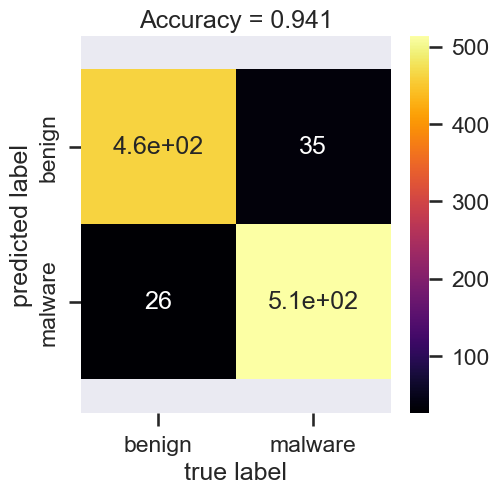

In [13]:
cm = confusion_matrix(y1_test, knnBest.predict(X1_test))
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True, xticklabels = y_classes, yticklabels = y_classes,cmap = "inferno")
plt.title('Accuracy = %2.3f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
ax.axis('equal')
plt.show()

#### Scaled

In [14]:
df1 = df.drop(['e_res', 'e_res2'], axis=1)
df1_train, df1_test = train_test_split(df1, test_size = 0.2, random_state = 3)

X1_train = df1_train.drop(['class'], axis=1)
X1_test = df1_test.drop(['class'], axis=1)
y1_train = df1_train['class']
y1_test = df1_test['class']

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [15]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');

grid.fit(X1_train, y1_train)
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']

kNN best param =  {'n_neighbors': 1}


In [16]:
k_neighbors= k_cv
knn2 = KNeighborsClassifier(k_neighbors)
knn2.fit(X1_train, y1_train)
y_pred = knn2.predict(X1_test)
cm = confusion_matrix(y1_test, y_pred)
acc = accuracy_score(y1_test, y_pred)
print(acc)

0.9691417550626809


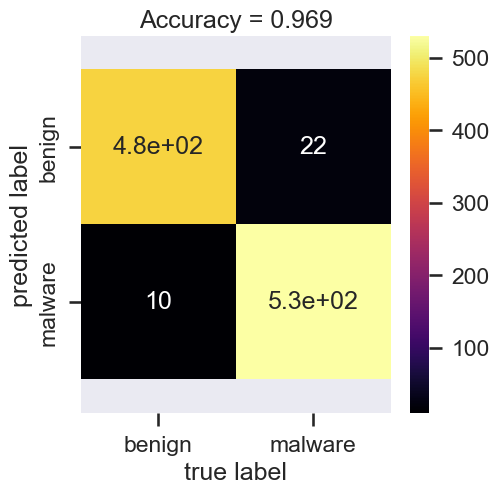

In [17]:
cm = confusion_matrix(y1_test, knnBest.predict(X1_test))
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True, xticklabels = y_classes, yticklabels = y_classes, cmap = "inferno")
plt.title('Accuracy = %2.3f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
ax.axis('equal')
plt.show()

#### Your comments here:

The accuracy increases from 94% to 96% after scaling

...

### Classifier 2: fill in the type here
* What type did you choose? Random Forest



#### Un-scaled

In [18]:
df2 = df.drop(['e_res', 'e_res2'], axis=1)
df2_train, df2_test = train_test_split(df2, test_size = 0.2, random_state = 3)
X2_train = df2_train.drop(['class'], axis=1)
X2_test = df2_test.drop(['class'], axis=1)
y2_train = df2_train['class']
y2_test = df2_test['class']

In [19]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [7, 9, 15],
    'max_features': [3,7],
    'min_samples_split' : [5, 10],
    'n_estimators': [40,60,80,100,150,200,400]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X2_train, y2_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_

Fitting 3 folds for each of 168 candidates, totalling 504 fits
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 60}


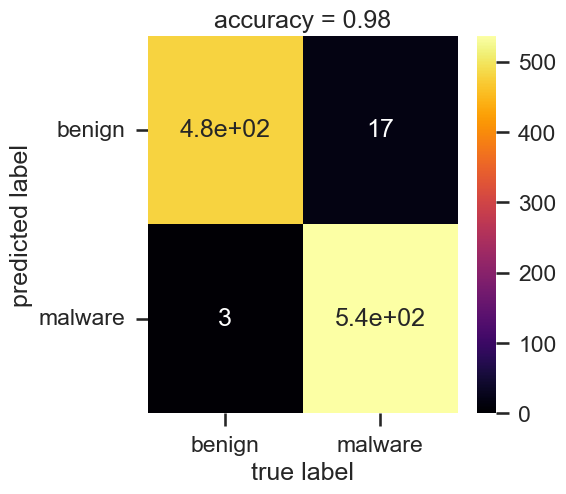

In [20]:
# Fitting 3 folds for each of 168 candidates, totalling 504 fits
# {'criterion': 'entropy', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 80}

clf_best.fit(X2_train, y2_train)
y_pred = clf_best.predict(X2_test)
acc = accuracy_score(y2_test, y_pred)
cm = confusion_matrix(y2_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=y_classes,yticklabels=y_classes)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


#### Scaled

In [22]:
df2 = df.drop(['e_res', 'e_res2'], axis=1)
df2_train, df2_test = train_test_split(df2, test_size = 0.2, random_state = 3)
X2_train = df2_train.drop(['class'], axis=1)
X2_test = df2_test.drop(['class'], axis=1)
y2_train = df2_train['class']
y2_test = df2_test['class']

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [23]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [7, 9, 15],
    'max_features': [3,7],
    'min_samples_split' : [5, 10],
    'n_estimators': [40,60,80,100,150,200,400]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X2_train, y2_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_

Fitting 3 folds for each of 168 candidates, totalling 504 fits
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 150}


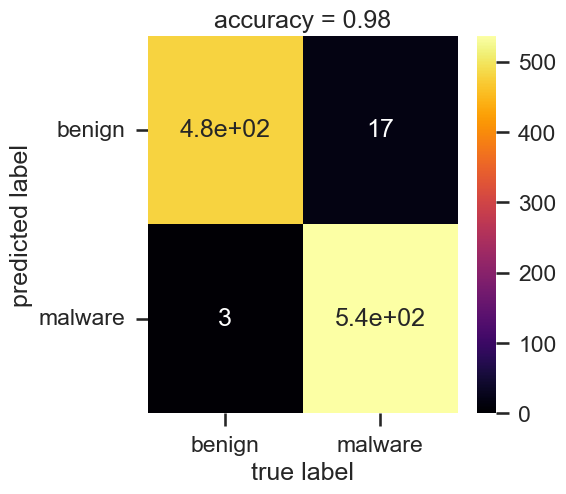

In [24]:
# Fitting 3 folds for each of 168 candidates, totalling 504 fits
# {'criterion': 'entropy', 'max_depth': 15, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 150}

clf_best.fit(X2_train, y2_train)
y_pred = clf_best.predict(X2_test)
acc = accuracy_score(y2_test, y_pred)
cm = confusion_matrix(y2_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=y_classes,yticklabels=y_classes)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


#### Your comments here:

After scaling, the accuracy does not change for Random Forest. It proves that Random Forest works very well with both scaled/unscaled data

...

### Classifier 3: fill in the type here
* What type did you choose? Neural network



In [46]:
df3 = df.drop(['e_res', 'e_res2'], axis=1)
df3_train, df3_test = train_test_split(df3, test_size = 0.2, random_state = 3)
X3_train = df3_train.drop(['class'], axis=1)
X3_test = df3_test.drop(['class'], axis=1)
y3_train = df3_train['class']
y3_test = df3_test['class']

X3_train = np.asarray(X3_train)
X3_test = np.asarray(X3_test)
y3_train = np.asarray(y3_train)
y3_test = np.asarray(y3_test)

In [47]:
tf.random.set_seed(0)

dropout = 0.2
epochs = 20
batch_size= 8
input_shape = X3_train[1].shape
print(input_shape)
#=====
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid'),                      # output to each class, could just stop here
])
#define our optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=1e-1, momentum=0.5, nesterov=False, name='SGD')

model.compile(optimizer=sgd,
            loss='mse', #need to define our loss function
            metrics=['accuracy'])
#====
tstart = tf.timestamp()

history = model.fit(X3_train, y3_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) # Store Data for evaluation in history

total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

(53,)
Epoch 1/20
415/415 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.4784 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 2/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.4682 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 3/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.4694 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 4/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.4754 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 5/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.4724 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 6/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.4736 - val_loss: 0.5241 - val_accuracy: 0.4759
Epoch 7/20
415/415 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.4652 - val_loss: 0.5241 - val_accuracy: 0.4759


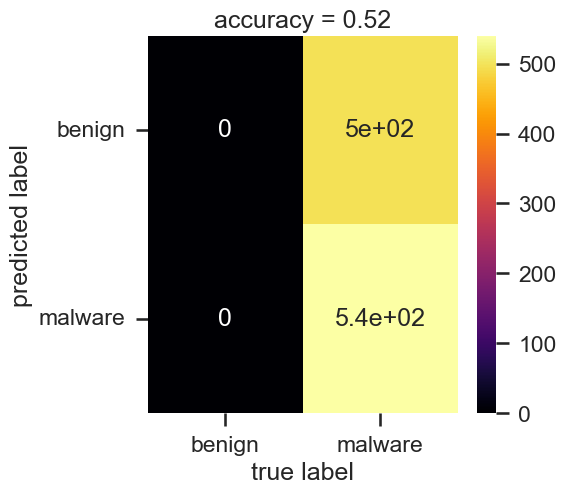

In [48]:
y_pred = model.predict(X3_test)
acc = accuracy_score(y3_test, y_pred)
cm = confusion_matrix(y3_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=y_classes,yticklabels=y_classes)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### Scaled

In [49]:
df3 = df.drop(['e_res', 'e_res2'], axis=1)
df3_train, df3_test = train_test_split(df3, test_size = 0.2, random_state = 3)
X3_train = df3_train.drop(['class'], axis=1)
X3_test = df3_test.drop(['class'], axis=1)
y3_train = df3_train['class']
y3_test = df3_test['class']

X3_train = np.asarray(X3_train)
X3_test = np.asarray(X3_test)
y3_train = np.asarray(y3_train)
y3_test = np.asarray(y3_test)

sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [51]:
tf.random.set_seed(0)

dropout = 0.2
epochs = 20
batch_size= 8
input_shape = X3_train[1].shape
print(input_shape)
#=====
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid'),                      # output to each class, could just stop here
])
#define our optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=1e-1, momentum=0.5, nesterov=False, name='SGD')

model.compile(optimizer=sgd,
            loss='mse', #need to define our loss function
            metrics=['accuracy'])
#====
tstart = tf.timestamp()

history = model.fit(X3_train, y3_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) # Store Data for evaluation in history

total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

(53,)
Epoch 1/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.8945 - val_loss: 0.0539 - val_accuracy: 0.9265
Epoch 2/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9400 - val_loss: 0.0451 - val_accuracy: 0.9386
Epoch 3/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9436 - val_loss: 0.0430 - val_accuracy: 0.9470
Epoch 4/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9475 - val_loss: 0.0444 - val_accuracy: 0.9482
Epoch 5/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9497 - val_loss: 0.0409 - val_accuracy: 0.9482
Epoch 6/20
415/415 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9497 - val_loss: 0.0357 - val_accuracy: 0.9542
Epoch 7/20
415/415 [==============================] - 1s 1ms/step - loss: 0.0365 - accuracy: 0.9557 - val_loss: 0.0383 - val_accuracy: 0.9506


#### Your comments here:

After scaling, the accuracy of neural network model increases significantly. This shows that neural networks are sensitive to scaling

...

#### Discussion questions
1. Complete the following table:  
* fill in your classifier type (e.g. Classifier 1 = kNN)

|  | KNN | Random Forest | Neural Net | 
| :- | - |- |- | 
| unscaled | 0.941 | 0.98 | 0.5289 |  
| scaled | 0.969 | 0.98 | 0.9578 | 

2. Discuss why scaling the data improves the accuracy for each classifier (or not).

* For KNN: KNN is distance based algorithm, so lesser the distance between the points, the better it performs
* For Neural Network: it needs scaled data to speed up learning and lead to faster convergence
* For Random Forest: is tree-based model which classifies by comparing value with a threshold, so it does not need scaling

3. Which classifier would you choose to use? Why?

* KNN: This is one of the most basic classifier for classification problem on labeled dataset.
* Random Forest: this is one of the best classifier for classification. It performs well for both scaled/unscaled data
* Neural Network: because of the requirement in the question. I used model that we used before in homeworks